In [58]:
import numpy as np
import os
from tqdm import tqdm
import ast
import matplotlib.pyplot as plt

In [71]:
class_map = {
    0:0, # clouds -> other
    1:1, # artificial -> artificial
    2:2, # Cultivated -> cultivated
    3:0, # vineyards -> other
    4:3, # broadleaf tree cover -> broadleaf tree cover
    5:4, # Coniferous tree cover -> Coniferous tree cover
    6:5, # Herbaceous vegetation -> Herbaceous vegetation
    7:6, # Moors and Heathland -> Moors and Heathland
    8:0, # Sclerophyllous vegetation -> other
    9:7, # Marches -> Marches
    10:8, # Peatbogs -> Peatbogs
    11:0, # Natural material -> other
    12:0, # snow -> other
    13:0, # water -> other
}

In [72]:
def create_class_from_num(num):
    c = np.zeros(9)
    c[class_map[num]] = 1
    return c

In [76]:

for dataset in ["train", "val", "test"]:
    root_dir = f"grid_dir/{dataset}/lc_classes"
    new_dir = f"grid_dir/{dataset}/reduced_classes"
    if not os.path.exists(new_dir):
        os.mkdir(new_dir)
    files = os.listdir(root_dir)
    print(dataset)
    for i in tqdm(range(len(files))):
        fn = files[i] 
        with np.load(os.path.join(root_dir, fn)) as f:
            lc = f["arr_0"]
        lc = np.argmax(lc, axis=2)
        reduced_lc = [create_class_from_num(i) for i in lc.flatten()]
        reduced_lc = np.array(reduced_lc).reshape(256,256,9)
        np.savez_compressed(os.path.join(new_dir, fn), reduced_lc)

  0%|          | 0/12324 [00:00<?, ?it/s]

train


  0%|          | 1/2881 [00:00<07:22,  6.51it/s]

val


  0%|          | 1/3153 [00:00<07:16,  7.22it/s]

test


100%|██████████| 3153/3153 [06:52<00:00,  7.64it/s]


In [66]:
n_lc.shape

(256, 256, 9)

In [51]:
n_lc

array([[[0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.]],

       [[0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0.

In [53]:
lc_labels = {
    str([255, 255, 255, 255]):"Other",
    str([210,0,0,255]):"Artificial surfaces and constructions",
    str([253,211,39,255]):"Cultivated areas",
    str([35,152,0,255]):"Broadleaf tree cover",
    str([8,98,0,255]):"Coniferous tree cover",
    str([249,150,39,255]):"Herbaceous vegetation",
    str([141,139,0,255]):"Moors and Heathland",
    str([149,107,196,255]):"Marshes",
    str([77,37,106,255]):"Peatbogs",
}

In [81]:
j = 0
for i in lc_labels:
    #print(f"{j}: str({i}),")
    print(f"{j}: '{lc_labels[i]}',")
    j += 1

0: 'Other',
1: 'Artificial surfaces and constructions',
2: 'Cultivated areas',
3: 'Broadleaf tree cover',
4: 'Coniferous tree cover',
5: 'Herbaceous vegetation',
6: 'Moors and Heathland',
7: 'Marshes',
8: 'Peatbogs',


In [60]:
lc_pixels = {
    0: str([255, 255, 255, 255]),
    1: str([210, 0, 0, 255]),
    2: str([253, 211, 39, 255]),
    3: str([35, 152, 0, 255]),
    4: str([8, 98, 0, 255]),
    5: str([249, 150, 39, 255]),
    6: str([141, 139, 0, 255]),
    7: str([149, 107, 196, 255]),
    8: str([77, 37, 106, 255]),
}

In [61]:
# to revert to an image
def create_img_pixels(img_classes):
    img = np.zeros((img_classes.shape[0], img_classes.shape[1], 4), dtype=np.uint8)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            img[i,j] = ast.literal_eval(lc_pixels[np.argmax(img_classes[i,j])])
    return img

In [62]:
img = create_img_pixels(n_lc)

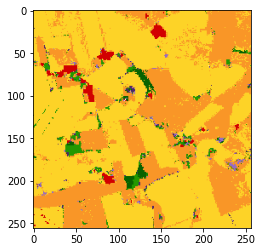

In [63]:
plt.imshow(img)